In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#scikit-learn

MACHINE LEARNING TECHINQUES

1. **Supervised learning:** se saben datos de entrada y datos de salida (clasificar o predecir)
2. **UnSpervised learning:** se tienen datos de entrada pero no datos de salida 
3. **Reinforcement learning:** elemento llamado agente se entrena para dar una prediccion y si no se cumple se penaliza 

* Supervised learning: 
  1. **Regresion (IA para predecir):** regresion lineal (comun), ridge, lasso (comun), elastic net, regresion logistica (logit), regresion softmax 
  2. **Clasificacion:**  support vector machine, arboles de decision, random forest, kneighbors, voting classifier, naive bayes, gradient boosting

* UnSpervised learning:
  kmeans(agrupar y clasificar), PCA (reduce la cantidad de columnas), DBSCAN, gaussian mixture, anglomerative clustering(agrupar y clasificar)





## **Supervised learning** - REGRESION

In [ ]:
# SCIKIT-LEARN 
# ESTADISTICA Y MATEMATICA para predecir una salida

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

archivo="/content/drive/MyDrive/datasets/catalogo.csv"
df=pd.read_csv(archivo, sep=",", header=0) 


#se puede imputar con la media (mean), mediana (median) y la moda (most_frequent)

#PRIMERA IMPITACION CON LA MEDIA
si=SimpleImputer(missing_values=np.nan, strategy="mean") #valores nulos 
df.Age=si.fit_transform(df.Age.values.reshape(-1,1)) #se llena el hueco remplazo de rena
df.Age.plot.history() #histograma de la variable edad

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np
 
from sklearn.impute import SimpleImputer
 
archivo = "/content/drive/MyDrive/datasets/titanic_dataset.csv"
df = pd.read_csv( archivo, sep="\t", header=0 )
 
# strategy="mean"
# strategy="median"
strategy="most_frequent"
si = SimpleImputer(missing_values=np.nan, strategy=strategy)
df.Age = si.fit_transform(df.Age.values.reshape(-1,1))
# df
df.Age.plot.hist()


# IRQ 
q1 = df.quantile( 0.25 )
q2 = df.quantile( 0.75 )
iqr = q2 - q1
df = df[((df > (q1 - (1.5 * iqr))) & (df < (q2 + 1.5 * iqr)))]

# IQR columna
q1 = df["sepal_width"].quantile(0.25)
q2 = df["sepal_width"].quantile(0.70)
iqr = q2 - q1
iris = df[((df["sepal_width"] > (q1 - (1.5 * iqr))) & (df["sepal_width"] < (q2 + 1.5 * iqr)))]

In [ ]:
#REGRESION LINEAL

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error #SOLAMENTE EN REGRESION LINEAL 

archivo = "/content/drive/MyDrive/datasets/Linear_regression_dataset.csv"
df = pd.read_csv( archivo, sep=",", header=0 )

#ENTRADA
features=["var_1","var_2","var_3","var_4","var_5"]


train,test, train_label, test_label = train_test_split(df[features],df["label"],random_state=0, train_size=0.30)

lr=LinearRegression()
modelo= lr.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()
#for i in range(len(test_label_list)):
#  print("prediccion: ",prediccion_list[i],"test_label_list: ",test_label_list[i])    #SOLO VISUALIZACION

score= modelo.score(test,test_label) #entre mejor pegado a 1, es mejor 
mae= mean_absolute_error(prediccion,test_label)  # mas pegado a 0, es mejor
mse= mean_squared_error(prediccion,test_label) # mas pegado a 0, es mejor

# MODELO ACEPTABLE > 70

print("\nREGRESION LINEAL\nscore= ", score, "\nmedia error absoluto=", mae,"\nmedia error cuadrado=", mse)

In [ ]:
#RIDGE

import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error #SOLAMENTE EN REGRESION LINEAL 

archivo = "/content/drive/MyDrive/datasets/Linear_regression_dataset.csv"
df = pd.read_csv( archivo, sep=",", header=0 )

#ENTRADA
features=["var_1","var_2","var_3","var_4","var_5"]


train,test, train_label, test_label = train_test_split(df[features],df["label"],random_state=0, train_size=0.30)

lr=Ridge()
modelo= lr.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()
#for i in range(len(test_label_list)):
#  print("prediccion: ",prediccion_list[i],"test_label_list: ",test_label_list[i])    #SOLO VISUALIZACION

score= modelo.score(test,test_label) #entre mejor pegado a 1, es mejor 
mae= mean_absolute_error(prediccion,test_label)  # mas pegado a 0, es mejor
mse= mean_squared_error(prediccion,test_label) # mas pegado a 0, es mejor

# MODELO ACEPTABLE > 70

print("\nRIDGE\nscore= ", score, "\nmedia error absoluto=", mae,"\nmedia error cuadrado=", mse)

In [ ]:
#LASSO

import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error #SOLAMENTE EN REGRESION LINEAL 

archivo = "/content/drive/MyDrive/datasets/Linear_regression_dataset.csv"
df = pd.read_csv( archivo, sep=",", header=0 )

#ENTRADA
features=["var_1","var_2","var_3","var_4","var_5"]


train,test, train_label, test_label = train_test_split(df[features],df["label"],random_state=0, train_size=0.30)

lr=Lasso()
modelo= lr.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()
#for i in range(len(test_label_list)):
#  print("prediccion: ",prediccion_list[i],"test_label_list: ",test_label_list[i])    #SOLO VISUALIZACION

score= modelo.score(test,test_label) #entre mejor pegado a 1, es mejor 
mae= mean_absolute_error(prediccion,test_label)  # mas pegado a 0, es mejor
mse= mean_squared_error(prediccion,test_label) # mas pegado a 0, es mejor

# MODELO ACEPTABLE > 70

print("\nLASSO\nscore= ", score, "\nmedia error absoluto=", mae,"\nmedia error cuadrado=", mse)

In [ ]:
# ELASTIC NET

import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error #SOLAMENTE EN REGRESION LINEAL 

archivo = "/content/drive/MyDrive/datasets/Linear_regression_dataset.csv"
df = pd.read_csv( archivo, sep=",", header=0 )

#ENTRADA
features=["var_1","var_2","var_3","var_4","var_5"]


train,test, train_label, test_label = train_test_split(df[features],df["label"],random_state=0, train_size=0.30)

lr=ElasticNet()
modelo= lr.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()
#for i in range(len(test_label_list)):
#  print("prediccion: ",prediccion_list[i],"test_label_list: ",test_label_list[i])    #SOLO VISUALIZACION

score= modelo.score(test,test_label) #entre mejor pegado a 1, es mejor 
mae= mean_absolute_error(prediccion,test_label)  # mas pegado a 0, es mejor
mse= mean_squared_error(prediccion,test_label) # mas pegado a 0, es mejor

# MODELO ACEPTABLE > 70

print("\nELASTIC NET\nscore= ", score, "\nmedia error absoluto=", mae,"\nmedia error cuadrado=", mse)

In [ ]:
# LOGISTIC REGRESSION 
# NO SE PUEDE USAR PORQUE SOLO MANEJA DATOS ENTEROS

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error #SOLAMENTE EN REGRESION LINEAL 

archivo = "/content/drive/MyDrive/datasets/Linear_regression_dataset.csv"
df = pd.read_csv( archivo, sep=",", header=0 )

#ENTRADA
features=["var_1","var_2","var_3","var_4","var_5"]


train,test, train_label, test_label = train_test_split(df[features],df["label"],random_state=0, train_size=0.30)

lr=LogisticRegression()
modelo= lr.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()
#for i in range(len(test_label_list)):
#  print("prediccion: ",prediccion_list[i],"test_label_list: ",test_label_list[i])    #SOLO VISUALIZACION

score= modelo.score(test,test_label) #entre mejor pegado a 1, es mejor 
mae= mean_absolute_error(prediccion,test_label)  # mas pegado a 0, es mejor
mse= mean_squared_error(prediccion,test_label) # mas pegado a 0, es mejor

# MODELO ACEPTABLE > 70

print("\nLOGISTIC REGRESION\nscore= ", score, "\nmedia error absoluto=", mae,"\nmedia error cuadrado=", mse)

In [ ]:
# TRUCO


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error #SOLAMENTE EN REGRESION LINEAL 
from sklearn.preprocessing import LabelEncoder # CONVIERTO DE STR TO INT

archivo = "//content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )

#conversion de str to int
le=LabelEncoder()
df["species_le"]=le.fit_transform(df["species"])

#ENTRADA
features=["sepal_length","sepal_width","petal_length","petal_width"]


train,test, train_label, test_label = train_test_split(df[features],df["species_le"],random_state=0, train_size=0.30)

lr=LogisticRegression()
modelo= lr.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()
#for i in range(len(test_label_list)):
#  print("prediccion: ",prediccion_list[i],"test_label_list: ",test_label_list[i])    #SOLO VISUALIZACION

score= modelo.score(test,test_label) #entre mejor pegado a 1, es mejor 
mae= mean_absolute_error(prediccion,test_label)  # mas pegado a 0, es mejor
mse= mean_squared_error(prediccion,test_label) # mas pegado a 0, es mejor

# MODELO ACEPTABLE > 70

print("\nLOGISTIC REGRESION\nscore= ", score, "\nmedia error absoluto=", mae,"\nmedia error cuadrado=", mse)

df

## **Supervised learning** - CLASIFICACION


LINEAR SVC
score=  0.9285714285714286 
accuracy_score= 0.9285714285714286 
confusion_matrix= [[32  1]
 [ 4 33]] 
f1_score= 0.9295774647887325 
classification_report=               precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.97      0.89      0.93        37

    accuracy                           0.93        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.93      0.93      0.93        70



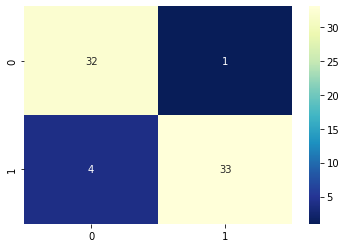

In [ ]:
#SUPPORT MACHICNE VECTOR

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder # CONVIERTO DE STR TO INT
from sklearn.svm import SVC
import seaborn as sns


archivo = "/content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )
df=df[df.species!="Iris-setosa"] #se elimina una planta ya q son 3

#conversion de str to int
le=LabelEncoder()
df["species_le"]=le.fit_transform(df["species"])

#ENTRADA
features=["sepal_length","sepal_width","petal_length","petal_width"]


train,test, train_label, test_label = train_test_split(df[features],df["species_le"],random_state=0, train_size=0.30)

svc=SVC()
modelo= svc.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()


score= modelo.score(test,test_label) 
acs= accuracy_score(prediccion,test_label)  
cm= confusion_matrix(prediccion,test_label) 
f1= f1_score(prediccion,test_label)  
cr= classification_report(prediccion,test_label) 

# MODELO ACEPTABLE > 70

print("\nLINEAR SVC\nscore= ", score, "\naccuracy_score=", acs,"\nconfusion_matrix=", cm,"\nf1_score=",f1,"\nclassification_report=",cr)

sns.heatmap(data=cm, cmap="YlGnBu_r", annot=True) #puede ayudar random forest


DECISION TREE CLASSIFIER
score=  0.9523809523809523 
accuracy_score= 0.9523809523809523 
confusion_matrix= [[33  0  0]
 [ 0 34  5]
 [ 0  0 33]] 
classification_report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.87      0.93        39
           2       0.87      1.00      0.93        33

    accuracy                           0.95       105
   macro avg       0.96      0.96      0.95       105
weighted avg       0.96      0.95      0.95       105



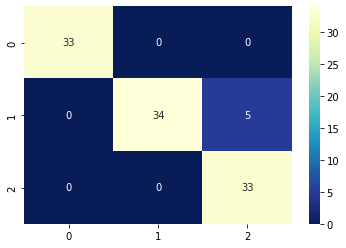

In [ ]:
# DECISION TREE CLASSIFIER - ya no es una clasificion binaria

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder # CONVIERTO DE STR TO INT
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


archivo = "/content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )


#conversion de str to int
le=LabelEncoder()
df["species_le"]=le.fit_transform(df["species"])

#ENTRADA
features=["sepal_length","sepal_width","petal_length","petal_width"]


train,test, train_label, test_label = train_test_split(df[features],df["species_le"],random_state=0, train_size=0.30)

dtc=DecisionTreeClassifier()
modelo= dtc.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()


score= modelo.score(test,test_label) 
acs= accuracy_score(prediccion,test_label)  
cm= confusion_matrix(prediccion,test_label) 
#f1= f1_score(prediccion,test_label)  
cr= classification_report(prediccion,test_label) 

# MODELO ACEPTABLE > 70

print("\nDECISION TREE CLASSIFIER\nscore= ", score, "\naccuracy_score=", acs,"\nconfusion_matrix=", cm,"\nclassification_report=",cr)

sns.heatmap(data=cm, cmap="YlGnBu_r", annot=True) #puede ayudar random forest


RANDOM FOREST
score=  0.9714285714285714 
accuracy_score= 0.9714285714285714 
confusion_matrix= [[33  0  0]
 [ 0 34  3]
 [ 0  0 35]] 
classification_report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.92      0.96        37
           2       0.92      1.00      0.96        35

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



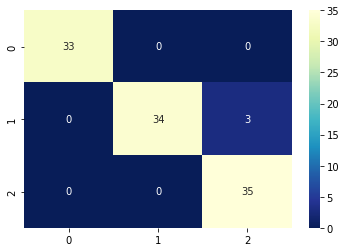

In [ ]:
# RANDOM FOREST

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder # CONVIERTO DE STR TO INT
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


archivo = "/content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )


#conversion de str to int
le=LabelEncoder()
df["species_le"]=le.fit_transform(df["species"])

#ENTRADA
features=["sepal_length","sepal_width","petal_length","petal_width"]


train,test, train_label, test_label = train_test_split(df[features],df["species_le"],random_state=0, train_size=0.30)

rfc=RandomForestClassifier()
modelo= rfc.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()


score= modelo.score(test,test_label) 
acs= accuracy_score(prediccion,test_label)  
cm= confusion_matrix(prediccion,test_label) 
#f1= f1_score(prediccion,test_label)  
cr= classification_report(prediccion,test_label) 

# MODELO ACEPTABLE > 70

print("\nRANDOM FOREST\nscore= ", score, "\naccuracy_score=", acs,"\nconfusion_matrix=", cm,"\nclassification_report=",cr)

sns.heatmap(data=cm, cmap="YlGnBu_r", annot=True)

prediccion:  2 test_label_list:  2
prediccion:  1 test_label_list:  1
prediccion:  0 test_label_list:  0
prediccion:  2 test_label_list:  2
prediccion:  0 test_label_list:  0
prediccion:  2 test_label_list:  2
prediccion:  0 test_label_list:  0
prediccion:  1 test_label_list:  1
prediccion:  1 test_label_list:  1
prediccion:  1 test_label_list:  1
prediccion:  1 test_label_list:  2
prediccion:  1 test_label_list:  1
prediccion:  1 test_label_list:  1
prediccion:  1 test_label_list:  1
prediccion:  1 test_label_list:  1
prediccion:  0 test_label_list:  0
prediccion:  1 test_label_list:  1
prediccion:  1 test_label_list:  1
prediccion:  0 test_label_list:  0
prediccion:  0 test_label_list:  0
prediccion:  2 test_label_list:  2
prediccion:  1 test_label_list:  1
prediccion:  0 test_label_list:  0
prediccion:  0 test_label_list:  0
prediccion:  2 test_label_list:  2
prediccion:  0 test_label_list:  0
prediccion:  0 test_label_list:  0
prediccion:  1 test_label_list:  1
prediccion:  1 test_

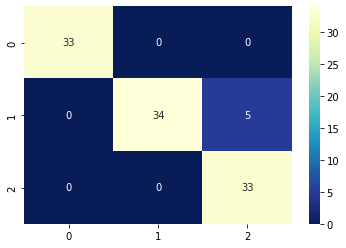

In [ ]:
# GRANDIENT BOOSTING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder # CONVIERTO DE STR TO INT
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns


archivo = "/content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )


#conversion de str to int
le=LabelEncoder()
df["species_le"]=le.fit_transform(df["species"])

#ENTRADA
features=["sepal_length","sepal_width","petal_length","petal_width"]


train,test, train_label, test_label = train_test_split(df[features],df["species_le"],random_state=0, train_size=0.30)

gbc=GradientBoostingClassifier()
modelo= gbc.fit(train,train_label)
prediccion= modelo.predict(test)

prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()

for i in range(len(test_label_list)):
 print("prediccion: ",prediccion_list[i],"test_label_list: ",test_label_list[i])    #SOLO VISUALIZACION



score= modelo.score(test,test_label) 
acs= accuracy_score(prediccion,test_label)  
cm= confusion_matrix(prediccion,test_label) 
#f1= f1_score(prediccion,test_label)  
cr= classification_report(prediccion,test_label) 

# MODELO ACEPTABLE > 70

print("\nGRANDIENT BOOSTING\nscore= ", score, "\naccuracy_score=", acs,"\nconfusion_matrix=", cm,"\nclassification_report=",cr)

sns.heatmap(data=cm, cmap="YlGnBu_r", annot=True)


RANDOM FOREST
score=  0.9523809523809523 
accuracy_score= 0.9523809523809523 
confusion_matrix= [[33  0  0]
 [ 0 34  5]
 [ 0  0 33]] 
classification_report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.87      0.93        39
           2       0.87      1.00      0.93        33

    accuracy                           0.95       105
   macro avg       0.96      0.96      0.95       105
weighted avg       0.96      0.95      0.95       105



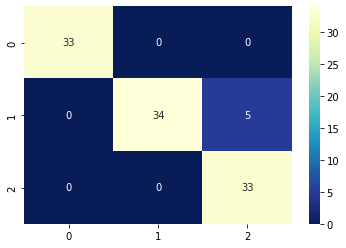

In [ ]:
# RANDOM FOREST V2 subir - decodificacion

import pandas as pd

from sklearn.preprocessing import LabelEncoder # CONVIERTO DE STR TO INT
from sklearn.ensemble import RandomForestClassifier


from joblib import dump


archivo = "/content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )



le=LabelEncoder()


dump(le,"/content/drive/MyDrive/datasets/le_species.joblib")

#ENTRADA
features=["sepal_length","sepal_width","petal_length","petal_width"]


train,test, train_label, test_label = train_test_split(df[features],df["species_le"],random_state=0, train_size=0.30)

rfc=RandomForestClassifier()
modelo= rfc.fit(train,train_label)
prediccion= modelo.predict(test)


#dump(modelo,"/content/drive/MyDrive/datasets/modelo_rfc.joblib")


prediccion_list=prediccion.tolist() 
test_label_list=test_label.tolist()


score= modelo.score(test,test_label) 
acs= accuracy_score(prediccion,test_label)  
cm= confusion_matrix(prediccion,test_label) 
#f1= f1_score(prediccion,test_label)  
cr= classification_report(prediccion,test_label) 

# MODELO ACEPTABLE > 70

print("\nRANDOM FOREST\nscore= ", score, "\naccuracy_score=", acs,"\nconfusion_matrix=", cm,"\nclassification_report=",cr)

sns.heatmap(data=cm, cmap="YlGnBu_r", annot=True)

In [ ]:
# RANDOM FOREST V2 cargar 

import pandas as pd

from sklearn.preprocessing import LabelEncoder # CONVIERTO DE STR TO INT
from sklearn.ensemble import RandomForestClassifier


from joblib import load


archivo = "/content/drive/MyDrive/datasets/iris_test.csv"
df = pd.read_csv( archivo, sep=",", header=0 )


le=load("/content/drive/MyDrive/datasets/le_species.joblib")

#ENTRADA
features=["sepal_length","sepal_width","petal_length","petal_width"]

modelo=load("/content/drive/MyDrive/datasets/modelo_rfc.joblib")
prediccion= modelo.predict(df[features])
prediccion_list=prediccion.tolist() 


for i in range(len(prediccion_list)):
 print("prediccion: ", le.inverse_transform([prediccion_list[i]]))

df["especies"]=le.inverse_transform(prediccion_list)
df

prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-setosa']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-versicolor']
prediccion:  ['Iris-virginica']
prediccion:  ['Iris-virginica']
prediccion:  ['Iris-virginica']
prediccion:  ['Iris-virginica']
prediccion:  ['Iris-virginica']
prediccion:  ['Iris-vi

,sepal_length,sepal_width,petal_length,petal_width,species,especies
0,5.1,3.5,1.4,0.2,NaN,Iris-setosa
1,4.9,3.0,1.4,0.2,NaN,Iris-setosa
2,4.7,3.2,1.3,0.2,NaN,Iris-setosa
3,4.6,3.1,1.5,0.2,NaN,Iris-setosa
4,5.0,3.6,1.4,0.2,NaN,Iris-setosa
5,5.4,3.9,1.7,0.4,NaN,Iris-setosa
6,4.6,3.4,1.4,0.3,NaN,Iris-setosa
7,5.0,3.4,1.5,0.2,NaN,Iris-setosa
8,4.4,2.9,1.4,0.2,NaN,Iris-setosa
9,4.9,3.1,1.5,0.1,NaN,Iris-setosa


# **UnSpervised learning**

[[5.92857143 2.74285714 4.4        1.37142857]
 [5.04       3.38       1.44       0.22      ]
 [6.9        3.26666667 5.96666667 2.13333333]]
v_measure_score=  0.7939786706353121
homogeneity_score=  0.8043836806293826


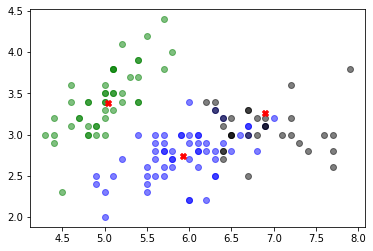

In [ ]:
# KMeans - genera grupos y clasificaciones 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import  v_measure_score, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



archivo = "/content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )


features=["sepal_length","sepal_width","petal_length","petal_width"]


train,test, train_label, test_label = train_test_split(df[features],df["species"],random_state=0, train_size=0.10)

km=KMeans(n_clusters=3,random_state=0) #que no rote los clusters
modelo= km.fit(train)
prediccion= modelo.predict(test) #predict or transform

prediccion_list=prediccion.tolist() 
#prediccion_list

#modelo.transform
#train["especias"]=train_label.tolist()
#train["grupo"]=modelo.labels_.tolist() #resultado esperado
#train

#modelo.prediction
test["especias"]= test_label.tolist()
test["grupo"]=prediccion_list
test



print(modelo.cluster_centers_)
vms= v_measure_score(prediccion,test_label)  
hs= homogeneity_score(prediccion,test_label) 
#f1= f1_score(prediccion,test_label)  
#cr= classification_report(prediccion,test_label) 

print("v_measure_score= ",vms)
print ("homogeneity_score= ",hs)

g0 = test[test.grupo == 0]
g1 = test[test.grupo == 1]
g2 = test[test.grupo == 2]
 
plt.scatter(g0["sepal_length"], g0[ "sepal_width"], color="blue", alpha=0.5)
plt.scatter(g1["sepal_length"] , g1["sepal_width"], color="green", alpha=0.5)
plt.scatter(g2["sepal_length"] , g2["sepal_width"], color="black", alpha=0.5)
plt.scatter(modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1], c="red", marker = "X")


In [ ]:
# PCA

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

archivo = "/content/drive/MyDrive/datasets/iris.csv"
df = pd.read_csv( archivo, sep=",", header=0 )


features=["sepal_length","sepal_width","petal_length","petal_width"]
train,test, train_label, test_label = train_test_split(df[features],df["species"],random_state=0, train_size=0.10)

pca=PCA(n_components=1) 
modelo= pca.fit(train)
modelo # sufre un proceso de estandarizacion 

archivo = "/content/drive/MyDrive/datasets/iris_test.csv"
df = pd.read_csv( archivo, sep=",", header=0 )
modelo.transform(df[features])


array([[-2.62349127],
       [-2.66926436],
       [-2.83385887],
       [-2.69051568],
       [-2.66250336],
       [-2.20686577],
       [-2.75484326],
       [-2.56671842],
       [-2.836681  ],
       [-2.62336597],
       [ 0.65528068],
       [ 0.87934487],
       [ 1.27107631],
       [ 0.83847522],
       [ 0.30567958],
       [ 0.20774094],
       [ 0.51335035],
       [ 0.94661988],
       [ 0.27028336],
       [-0.66925475],
       [ 0.40607182],
       [ 0.39059005],
       [ 0.43126201],
       [ 0.68985629],
       [-0.86771093],
       [ 0.34929897],
       [ 2.61030355],
       [ 1.4704024 ],
       [ 2.66853479],
       [ 2.02999879],
       [ 2.41160038],
       [ 3.44655112],
       [ 0.57842254]])